## PHASE 1 PROJECT

* Student name: Simon Makumi
* Instructor name: Asha Deen
## Business Understanding:
#### Goal
To provide actionable insights for Microsoft's new movie studio by exploring trends in the film industry and identifying potential areas of opportunity for creating successful films.
#### Key Questions:
* What types of films are currently performing well at the box office?
* What genres are most popular among audiences?
* How do factors like production budget and ratings influence a film's success?
* Who are the top writers and producers?
##### Outcome:
* Provide recommendations on the types of films Microsoft's new movie studio should consider producing to maximize profitability and audience engagement.

## Data understanding:

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Loading the first dataset
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Displaying the first few rows
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Loading the second dataset
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')

# Displaying the first few rows
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Loading the third dataset
tmdb_movies = pd.read_csv('tmdb.movies.csv')

# Display the first few rows
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Connecting to the SQL database
conn = sqlite3.connect('zippedData/im.db')

# Loading tables into Pandas DataFrames
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)
writers = pd.read_sql_query("""
SELECT DISTINCT p.primary_name, mb.genres
FROM movie_basics mb
JOIN writers w ON mb.movie_id = w.movie_id
JOIN persons p ON w.person_id = p.person_id
WHERE mb.genres IN ('Drama', 'Documentary', 'Comedy', 'Comedy, Documentary, Fantasy', 'Documentary, Family, Musical', 'History, Sport');
""", conn)
directors = pd.read_sql_query("""
SELECT DISTINCT p.primary_name, mb.genres
FROM movie_basics mb
JOIN directors d ON mb.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id
WHERE mb.genres IN ('Drama', 'Documentary', 'Comedy', 'Comedy, Documentary, Fantasy', 'Documentary, Family, Musical', 'History, Sport');
""", conn)

# Closing the database connection
conn.close()

# Display the first few rows of each table
print("Movie Basics Table:")
print(movie_basics.head())
print("\nMovie Ratings Table:")
print(movie_ratings.head())
print("\nMovie AKAs Table:")
print(movie_akas.head())
print("\nWriters Table:")
print(writers.head())
print("\nDirectors Table:")
print(directors.head())

Movie Basics Table:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

Movie Ratings Table:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt104

## Data Preparation:
#### Performing some data preparation such as:
* Handling missing values
* Data type conversions
* Merging/joining datasets if necessary
* Cleaning and transforming data as needed

In [6]:
# Checking for missing values in tn_movie_budgets
tn_movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [7]:
# Checking for missing values in bom_movie_gross
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
# Clean 'foreign_gross' column by removing commas and converting to numeric format
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(',', '').astype(float)

# Computing the median for 'foreign_gross' column
foreign_gross_median = bom_movie_gross['foreign_gross'].median()

# Replacing missing values in 'foreign_gross' column with median
bom_movie_gross['foreign_gross'].fillna(foreign_gross_median, inplace=True)

In [9]:
# Convert 'domestic_gross' column to numeric format
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')

# Computing the median for 'domestic_gross' column
domestic_gross_median = bom_movie_gross['domestic_gross'].median()

# Replacing missing values in 'domestic_gross' column with median
bom_movie_gross['domestic_gross'].fillna(domestic_gross_median, inplace=True)

In [10]:
# Checking for missing values 
tmdb_movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [11]:
# Checking for missing values in movie_basics table
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
# Check for missing values in movie_ratings table
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [13]:
# Check for missing values in movie_akas table
movie_akas.isnull().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [14]:
# Replacing missing values in 'original_title' column with an Unknown
movie_basics['original_title'].fillna('Unknown', inplace=True)

# Replacing missing values in 'runtime_minutes' column with median
runtime_median = movie_basics['runtime_minutes'].median()
movie_basics['runtime_minutes'].fillna(runtime_median, inplace=True)

# Imputing missing values in 'genres' column with a placeholder
movie_basics['genres'].fillna('Unknown', inplace=True)

# Dropping 'region', 'language', 'types', and 'attributes' columns from movie_akas table(They have a lot of null values)
movie_akas.drop(['region', 'language', 'types', 'attributes'], axis=1, inplace=True)

# Imputing missing values in 'is_original_title' column with 0 (assuming False)
movie_akas['is_original_title'].fillna(0, inplace=True)


## Data Analysis and Visualization:

##### Descriptive Statistics

In [15]:
# Removing commas and dollar signs, then convert to float
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Calculate summary statistics for production budget
production_budget_stats = tn_movie_budgets['production_budget'].describe()

# Calculate summary statistics for domestic gross earnings
domestic_gross_stats = tn_movie_budgets['domestic_gross'].describe()

# Calculate summary statistics for worldwide gross earnings
worldwide_gross_stats = tn_movie_budgets['worldwide_gross'].describe()

print("Production Budget Statistics:")
print(production_budget_stats)
print("\nDomestic Gross Earnings Statistics:")
print(domestic_gross_stats)
print("\nWorldwide Gross Earnings Statistics:")
print(worldwide_gross_stats)

Production Budget Statistics:
count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

Domestic Gross Earnings Statistics:
count    5.782000e+03
mean     4.187333e+07
std      6.824060e+07
min      0.000000e+00
25%      1.429534e+06
50%      1.722594e+07
75%      5.234866e+07
max      9.366622e+08
Name: domestic_gross, dtype: float64

Worldwide Gross Earnings Statistics:
count     5782
unique    5356
top         $0
freq       367
Name: worldwide_gross, dtype: object


In [16]:
# Removing commas and dollar signs, then convert to float
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Calculating the correlation
correlation = tn_movie_budgets['production_budget'].corr(tn_movie_budgets['worldwide_gross'])
print("Correlation between Production Budget and Worldwide Gross Earnings:", correlation)

Correlation between Production Budget and Worldwide Gross Earnings: 0.7483059765694747


##### Analysis on bom_movie_gross

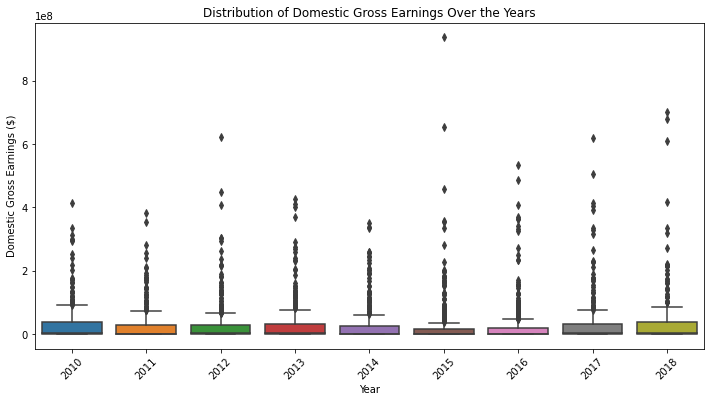

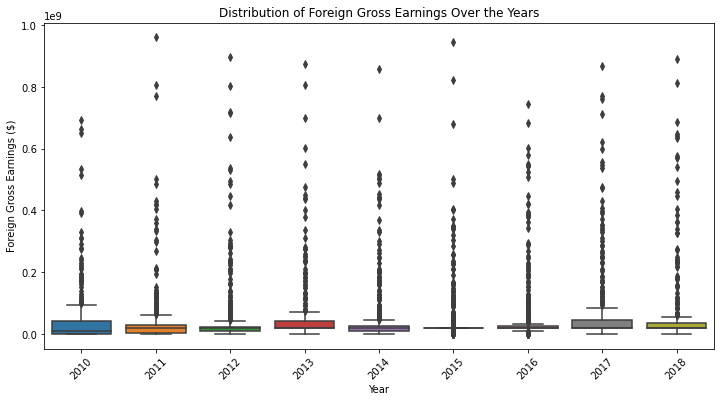

In [17]:
# Plotting the distribution of domestic gross earnings over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=bom_movie_gross, x='year', y='domestic_gross')
plt.title('Distribution of Domestic Gross Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Domestic Gross Earnings ($)')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of foreign gross earnings over the years
plt.figure(figsize=(12, 6))
sns.boxplot(data=bom_movie_gross, x='year', y='foreign_gross')
plt.title('Distribution of Foreign Gross Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Foreign Gross Earnings ($)')
plt.xticks(rotation=45)
plt.show()


###### Top movies by domestic and foreign gross

In [18]:
# Identifying the top movies by domestic gross
top_movies_domestic = bom_movie_gross.sort_values(by='domestic_gross', ascending=False).head(10)
print("Top Movies by Domestic Gross:")
top_movies_domestic[['title', 'studio', 'domestic_gross', 'year']]

Top Movies by Domestic Gross:


,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,2017
3082,Incredibles 2,BV,608600000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,2017
2324,Finding Dory,BV,486300000.0,2016


In [19]:
# Identifying the top movies by foreign gross
top_movies_foreign = bom_movie_gross.sort_values(by='foreign_gross', ascending=False).head(10)
print("Top Movies by Foreign Gross:")
top_movies_foreign[['title', 'studio', 'foreign_gross', 'year']]

Top Movies by Foreign Gross:


,title,studio,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,960500000.0,2011
1875,Avengers: Age of Ultron,BV,946400000.0,2015
727,Marvel's The Avengers,BV,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,891800000.0,2018
1127,Frozen,BV,875700000.0,2013
2764,Wolf Warrior 2,HC,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,858600000.0,2014
1876,Minions,Uni.,823400000.0,2015
3083,Aquaman,WB,812700000.0,2018
1128,Iron Man 3,BV,805800000.0,2013


#### Analysing tmdb_movies for:
* Language distribution

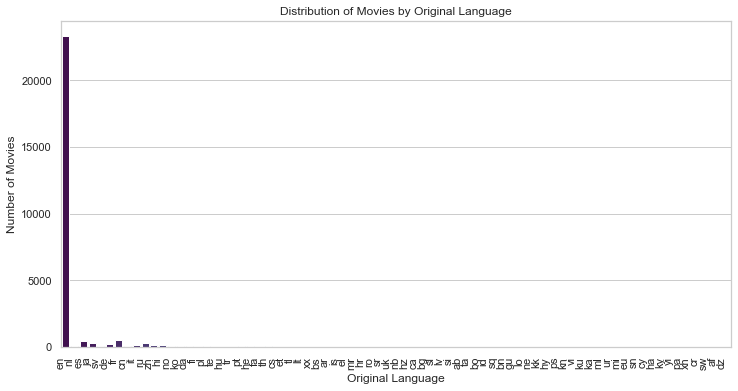

In [20]:
# Setting the style for the plot
sns.set(style="whitegrid")

# Plotting the distribution of movies by original language
plt.figure(figsize=(12, 6))
language_plot = sns.countplot(data=tmdb_movies, x='original_language', palette='viridis')
language_plot.set_title('Distribution of Movies by Original Language')
language_plot.set_xlabel('Original Language')
language_plot.set_ylabel('Number of Movies')

# Rotate x-axis labels for better readability
language_plot.set_xticklabels(language_plot.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

### Merging Data from the Database and Analyzing

In [21]:
merged_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')
merged_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown,NaN,NaN


In [22]:
merged_data.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating      72288
numvotes           72288
dtype: int64

In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [24]:
# Dropping rows where 'averagerating' or 'numvotes' is null
merged_data.dropna(subset=['averagerating', 'numvotes'], inplace=True)

In [25]:
merged_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


#### Top 10 produced genres

In [26]:
top_10_produced_genres = merged_data['genres'].value_counts().head(10)
print("Top 10 produced genres:")
top_10_produced_genres

Top 10 produced genres:


Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: genres, dtype: int64

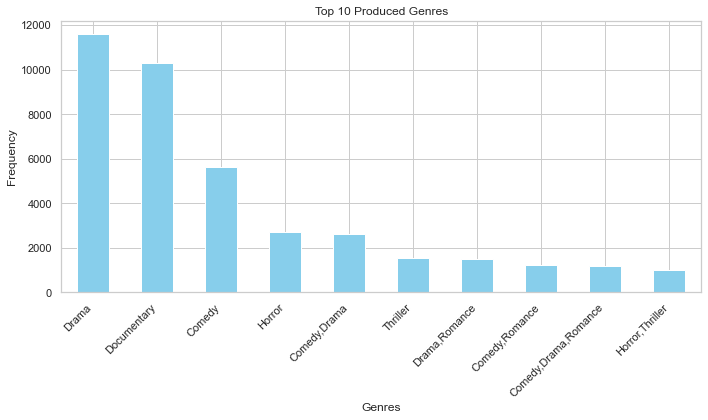

In [27]:
plt.figure(figsize=(10, 6))
top_10_produced_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Produced Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Average rating of each genre

In [28]:
average_rating_by_genre = merged_data.groupby('genres')['averagerating'].mean()
print("Average rating of each genre:")
average_rating_by_genre

Average rating of each genre:


genres
Action                        5.757712
Action,Adult,Comedy           4.650000
Action,Adventure              5.223529
Action,Adventure,Animation    6.562874
Action,Adventure,Biography    7.061905
                                ...   
Thriller,War                  5.650000
Thriller,Western              7.150000
Unknown                       6.496144
War                           6.134043
Western                       5.037333
Name: averagerating, Length: 924, dtype: float64

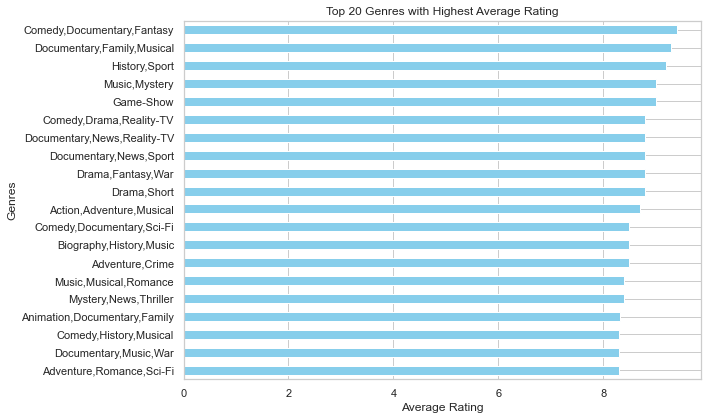

In [29]:
# Top 20 genres with highest average rating
# Calculating average rating of each genre
average_rating_by_genre = merged_data.groupby('genres')['averagerating'].mean()
top_20_high_rating_genres = average_rating_by_genre.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_high_rating_genres.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 Genres with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

#### Correlation between movie rating and votes

In [30]:
# Analyze whether highly rated movies tend to receive more votes
correlation_rating_votes = merged_data['averagerating'].corr(merged_data['numvotes'])
print("Correlation between average rating and number of votes:")
correlation_rating_votes

Correlation between average rating and number of votes:


0.04447809440198383

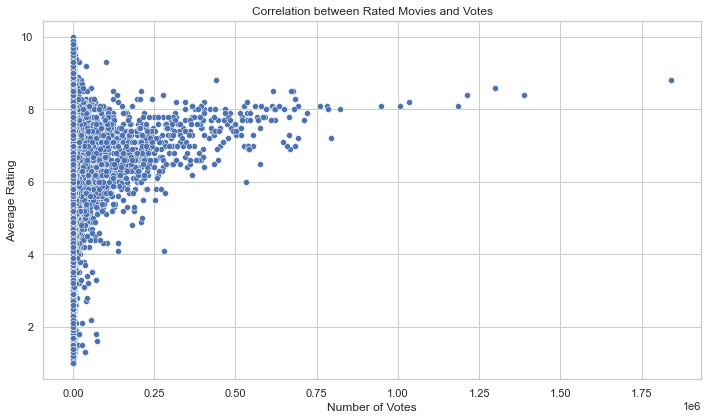

In [31]:
# Correlation between Rated Movies and Votes (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='averagerating', data=merged_data)
plt.title('Correlation between Rated Movies and Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

#### Top 5 writers for each genre

In [32]:
# Group by genres and primary_name, then count occurrences
genre_counts = writers.groupby(['genres', 'primary_name']).size().reset_index(name='count')

# Sort by genre and count
genre_counts = genre_counts.sort_values(by=['genres', 'count'], ascending=[True, False])

# Get top 5 writers for each genre
top_writers_per_genre = genre_counts.groupby('genres').head(5)

# Create a DataFrame to display the results
result_df = pd.DataFrame(columns=['Genre', 'Writer'])

# Populate the DataFrame with top 5 writers for each genre
for genre, group in top_writers_per_genre.groupby('genres'):
    result_df = pd.concat([result_df, pd.DataFrame({'Genre': [genre]*len(group), 'Writer': group['primary_name'].tolist()})])

# Reset index
result_df.reset_index(drop=True, inplace=True)

result_df

,Genre,Writer
0,Comedy,'Om' Rakesh Chaturvedi
1,Comedy,A. Blaine Miller
2,Comedy,A. Sarkunam
3,Comedy,A. Venkatesh
4,Comedy,A.A. Junaideen
5,Documentary,A. Branham Dyer
6,Documentary,A. García de Quirós
7,Documentary,A. Onomen Asikele
8,Documentary,A. Susan Svehla
9,Documentary,A.A. Abdo


#### Top 5 directors of each genre

In [33]:
# Group by genres and primary_name, then count occurrences
d_genre_counts = directors.groupby(['genres', 'primary_name']).size().reset_index(name='count')

# Sort by genre and count
d_genre_counts = d_genre_counts.sort_values(by=['genres', 'count'], ascending=[True, False])

# Get top 5 writers for each genre
top_directors_per_genre = d_genre_counts.groupby('genres').head(5)

# Create a DataFrame to display the results
director_result_df = pd.DataFrame(columns=['Genre', 'Director'])

# Populate the DataFrame with top 5 writers for each genre
for genre, group in top_directors_per_genre.groupby('genres'):
    director_result_df = pd.concat([director_result_df, pd.DataFrame({'Genre': [genre]*len(group), 'Director': group['primary_name'].tolist()})])

# Reset index
director_result_df.reset_index(drop=True, inplace=True)

director_result_df

,Genre,Director
0,Comedy,A. Blaine Miller
1,Comedy,A. Razak Mohaideen
2,Comedy,A. Sarkunam
3,Comedy,A. Todd Smith
4,Comedy,A. Venkatesh
5,Documentary,A. Branham Dyer
6,Documentary,A. Onomen Asikele
7,Documentary,A.D. Oppenheim
8,Documentary,A.J. Ali
9,Documentary,A.J. Calomay


# Conclusion
* English is the predominant language in movies according to the graph.
* Domestic Gross Earnings show an increasing trend over the years according to boxplot.
* Foreign Gross Earnings exhibit significant variability.
* Some of the most produced genres include Drama, Documentary and Comedy.
* Top 5 Genres with Highest Average Rating vary from Comedy to Documentary and Musical.
* There is no significant correlation between movie rating and votes according to the scatters plot.
* The directors with most movies in Comedy, Documentary and Drama are A. Blaine Miller, A. Branham Dyer and 'Atlas' Ramachandran respectively.
* The writers with most movies in Comedy, Documentary, Drama are 'Om' Rakesh Chaturvedi, A. Branham Dyer, A Rahman.